# Plotting networks in python

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx
import sciplotlib.style as splstyle

## Load data and get correlation matrix

In [2]:
example_correlation_matrix = np.random.normal(0, 0.1, size=(60, 60))
np.fill_diagonal(example_correlation_matrix, 1)

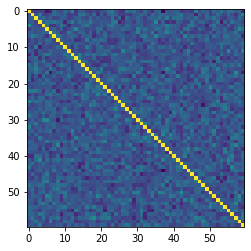

In [3]:
fig, ax = plt.subplots()
ax.imshow(example_correlation_matrix)
corr_threshold = 0.2
thresholded_correlation_matrix = example_correlation_matrix.copy()
thresholded_correlation_matrix[thresholded_correlation_matrix < corr_threshold] = 0

## Network X + matplotlib

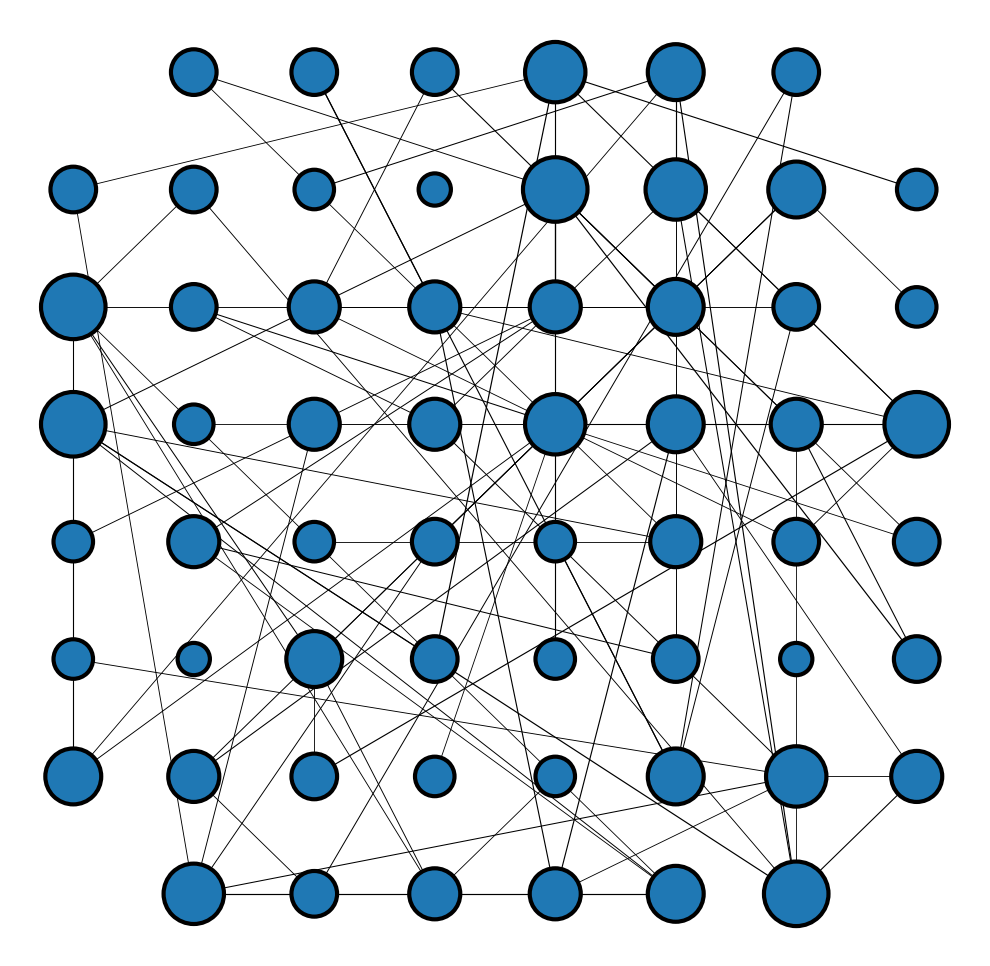

In [4]:
# G = nx.grid_2d_graph(8, 8)
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    G = nx.from_numpy_matrix(thresholded_correlation_matrix)
    # pos = nx.spring_layout(G)

    x_pos = np.arange(0, 8)
    y_pos = np.arange(0, 8)
    xx, yy = np.meshgrid(x_pos, y_pos)
    coord = np.array([xx.flatten(), yy.flatten()]).T
    four_corner_removed_coord = np.concatenate([coord[1:7, :], coord[8:56], coord[57:64]])

    # scale node size by degree
    degree = dict(G.degree)
    degree_to_size_multiplier = 30
    node_size = [v * degree_to_size_multiplier for v in degree.values()]

    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]


    nx.draw(G, pos=four_corner_removed_coord, node_size=node_size, width=weights)



In [5]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59))

## Bokeh

See: https://docs.bokeh.org/en/latest/docs/user_guide/graph.html

In [6]:
import bokeh as bk
from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, StaticLayoutProvider)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

In [7]:
coord_dict = dict()
for n_node, node in enumerate(G):
    coord_dict[node] = (four_corner_removed_coord[n_node, 0], four_corner_removed_coord[n_node, 1])

In [9]:
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1,8), y_range=Range1d(-1,8))
plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())
graph_layout = StaticLayoutProvider(graph_layout=coord_dict)

graph_renderer = from_networkx(G, nx.spring_layout)  # the postion here does not matter
graph_renderer.layout_provider = graph_layout
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

# line width depends on edge weight
graph_renderer.edge_renderer.data_source.data["line_width"] = [G.get_edge_data(a,b)['weight'] for a, b in G.edges()]
graph_renderer.edge_renderer.glyph.line_width = {'field': 'line_width'}

plot.renderers.append(graph_renderer)

show(plot)